# New York City Taxi-Trip Duration

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## load data

In [2]:
df = pd.read_csv(r"D:\Trip-Duration-Prediction\data\raw\train.csv")

In [3]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [4]:
df.shape

(1000000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [6]:
df.duplicated().count()

1000000

In [7]:
df.isnull().sum()


id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
df = df.drop(columns=["id"],axis=True)

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
vendor_id,1000000.0,1.534793,0.498788,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1000000.0,1.665353,1.315723,0.000000,1.000000,1.000000,2.000000,7.000000e+00
pickup_longitude,1000000.0,-73.973475,0.065404,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1000000.0,40.750947,0.033745,34.359695,40.737372,40.754131,40.768379,5.188108e+01
dropoff_longitude,1000000.0,-73.973421,0.065432,-121.933304,-73.991341,-73.979767,-73.963036,-6.133553e+01
dropoff_latitude,1000000.0,40.751829,0.035782,34.359695,40.735928,40.754551,40.769833,4.392103e+01
trip_duration,1000000.0,954.884971,3882.070116,1.000000,397.000000,662.000000,1074.000000,2.227612e+06


## 📊 Insights from Data Description

### 1. Vendor ID
- Only two possible values: `1` and `2`.  
- Distribution is nearly balanced (mean ≈ 1.53).  
- Represents two taxi companies operating the trips.  

### 2. Passenger Count
- Average ≈ 1.66 passengers per trip.  
- Median = 1 → most trips have a single passenger.  
- Some trips show `0` passengers (likely errors or anomalies).  
- Maximum = 7 passengers, which might represent larger vehicles or data errors.  

### 3. Pickup/Dropoff Longitude & Latitude
- Most values are around (-73, 40), which corresponds to New York City.  
- However, there are extreme min/max values (e.g., longitude ≈ -121, latitude ≈ 34) far outside NYC → **outliers or incorrect data**.  

### 4. Trip Duration (in seconds)
- Mean ≈ 955 seconds (~16 minutes).  
- Median = 662 seconds (~11 minutes) → indicates a skewed distribution with some very long trips.  
- 75th percentile = 1074 seconds (~18 minutes).  
- Maximum = 2,227,612 seconds (~25 days) → unrealistic, clear anomaly.  

---

## 🔎 Key Notes
- The dataset contains **outliers** (in both coordinates and trip durations).  
- **Passenger count has invalid values** (0 or unusually high).  
- Most trips are short (10–20 minutes) with 1–2 passengers.  
- **Data cleaning is necessary** before modeling:  
  - Remove or correct invalid coordinates.  
  - Filter out unrealistic trip durations.  
  - Handle invalid passenger counts.  


## Converting Columns to Datetime

In [10]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [11]:
df["pickup_year"] = df["pickup_datetime"].dt.year
df["pickup_month"] = df["pickup_datetime"].dt.month
df["pickup_day"] = df["pickup_datetime"].dt.day
df["pickup_hour"] = df.pickup_datetime.dt.hour
df['dayofyear'] = df.pickup_datetime.dt.dayofyear

df["pickup_dayofweek"] = df["pickup_datetime"].dt.dayofweek

In [12]:
df = df.drop(columns=["pickup_datetime"])

In [13]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,dayofyear,pickup_dayofweek
0,2,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,2016,6,8,7,160,2
1,2,1,-73.978394,40.764351,-73.991623,40.749859,N,827,2016,4,3,12,94,6
2,2,5,-73.989059,40.744389,-73.973381,40.748692,N,614,2016,6,5,2,157,6
3,2,2,-73.990326,40.731136,-73.991264,40.748917,N,867,2016,5,5,17,126,3
4,1,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,2016,5,12,17,133,3


In [185]:
df["pickup_year"].value_counts()

,count
pickup_year,
2016,1000000


In [186]:
df = df.drop(columns=["pickup_year"])

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   vendor_id          1000000 non-null  int64  
 1   passenger_count    1000000 non-null  int64  
 2   pickup_longitude   1000000 non-null  float64
 3   pickup_latitude    1000000 non-null  float64
 4   dropoff_longitude  1000000 non-null  float64
 5   dropoff_latitude   1000000 non-null  float64
 6   trip_duration      1000000 non-null  int64  
 7   pickup_month       1000000 non-null  int32  
 8   pickup_day         1000000 non-null  int32  
 9   pickup_hour        1000000 non-null  int32  
 10  dayofyear          1000000 non-null  int32  
 11  pickup_dayofweek   1000000 non-null  int32  
dtypes: float64(4), int32(5), int64(3)
memory usage: 72.5 MB


## Log Transformation of Trip Duration

The original `trip_duration` variable is highly skewed, with a long tail caused by extremely long trips (outliers).  
To reduce skewness and stabilize variance, we apply a logarithmic transformation using `np.log1p`.  

The histogram below shows the distribution of the log-transformed trip duration.


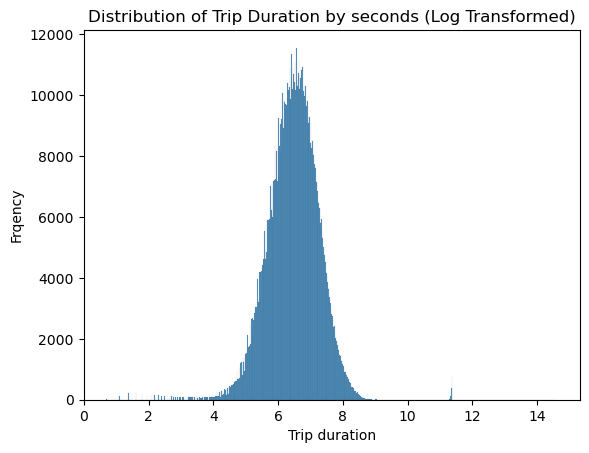

In [ ]:
df['trip_by_seconds_Log_Transformed'] = np.log1p(df['trip_duration'].values)  
fig = sns.histplot(df['trip_by_seconds_Log_Transformed'] ,label = "Trip duration")
plt.title('Distribution of Trip Duration by seconds (Log Transformed)')
plt.xlabel('Trip duration')
plt.ylabel('Frqency')
plt.show()

In [36]:
df['trip_duration_log'] = np.log1p(df['trip_duration'])
df.drop('trip_duration', axis=1, inplace=True)

## Discrete Numerical Feature Analysis

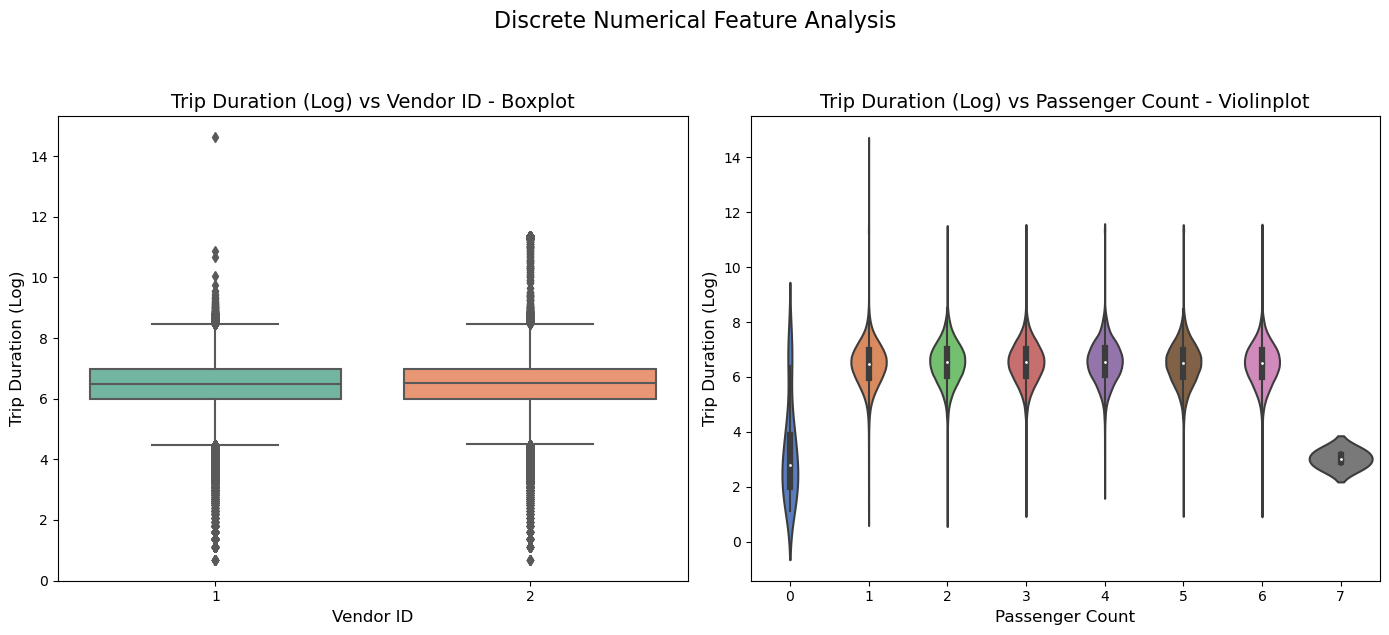

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Subplot 1: Boxplot for vendor_id
sns.boxplot(data=df, x="vendor_id", y="trip_by_seconds_Log_Transformed", palette="Set2", ax=axes[0])
axes[0].set_title("Trip Duration (Log) vs Vendor ID - Boxplot", fontsize=14)
axes[0].set_xlabel("Vendor ID", fontsize=12)
axes[0].set_ylabel("Trip Duration (Log)", fontsize=12)

# Subplot 2: Violinplot for passenger_count
sns.violinplot(data=df, x="passenger_count", y="trip_by_seconds_Log_Transformed", palette="muted", ax=axes[1])
axes[1].set_title("Trip Duration (Log) vs Passenger Count - Violinplot", fontsize=14)
axes[1].set_xlabel("Passenger Count", fontsize=12)
axes[1].set_ylabel("Trip Duration (Log)", fontsize=12)

plt.suptitle("Discrete Numerical Feature Analysis", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


### Vendor ID vs Trip Duration (Log)
- The distribution of trip duration (log-transformed) is very similar across both vendors (`1` and `2`).  
- Median trip durations are nearly identical for both vendors.  
- Both vendors show the presence of outliers with unusually long trips.  
- This suggests that **vendor_id may not be a strong predictor of trip duration**.

### Passenger Count vs Trip Duration (Log)
- Most trips have **1 or 2 passengers**, with very few trips having higher passenger counts.  
- Median trip duration does not change significantly as the number of passengers increases.  
- Trips with `0` passengers appear in the data, which is likely **invalid or erroneous**.  
- Trips with 6–7 passengers are rare and show inconsistent trip duration distributions.  
- Overall, **passenger_count has weak predictive power**, except to highlight data anomalies (e.g., `0` passengers).



## Geographical Data

In [21]:
def euclidean_distance_row(row):
    # constants
    km_per_degree_lat = 111  # approx. km per degree latitude

    # longitude correction depends on latitude
    avg_lat_rad = math.radians((row['pickup_latitude'] + row['dropoff_latitude']) / 2)
    km_per_degree_lon = 111 * math.cos(avg_lat_rad)

    dx = (row['dropoff_longitude'] - row['pickup_longitude']) * km_per_degree_lon
    dy = (row['dropoff_latitude'] - row['pickup_latitude']) * km_per_degree_lat

    return math.sqrt(dx**2 + dy**2)


In [22]:
df['euclidean_distance'] = df.apply(euclidean_distance_row, axis=1)


C:\Users\omnia\AppData\Local\Temp\ipykernel_25880\1353373606.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='euclidean_distance', palette='magma', ax=ax)


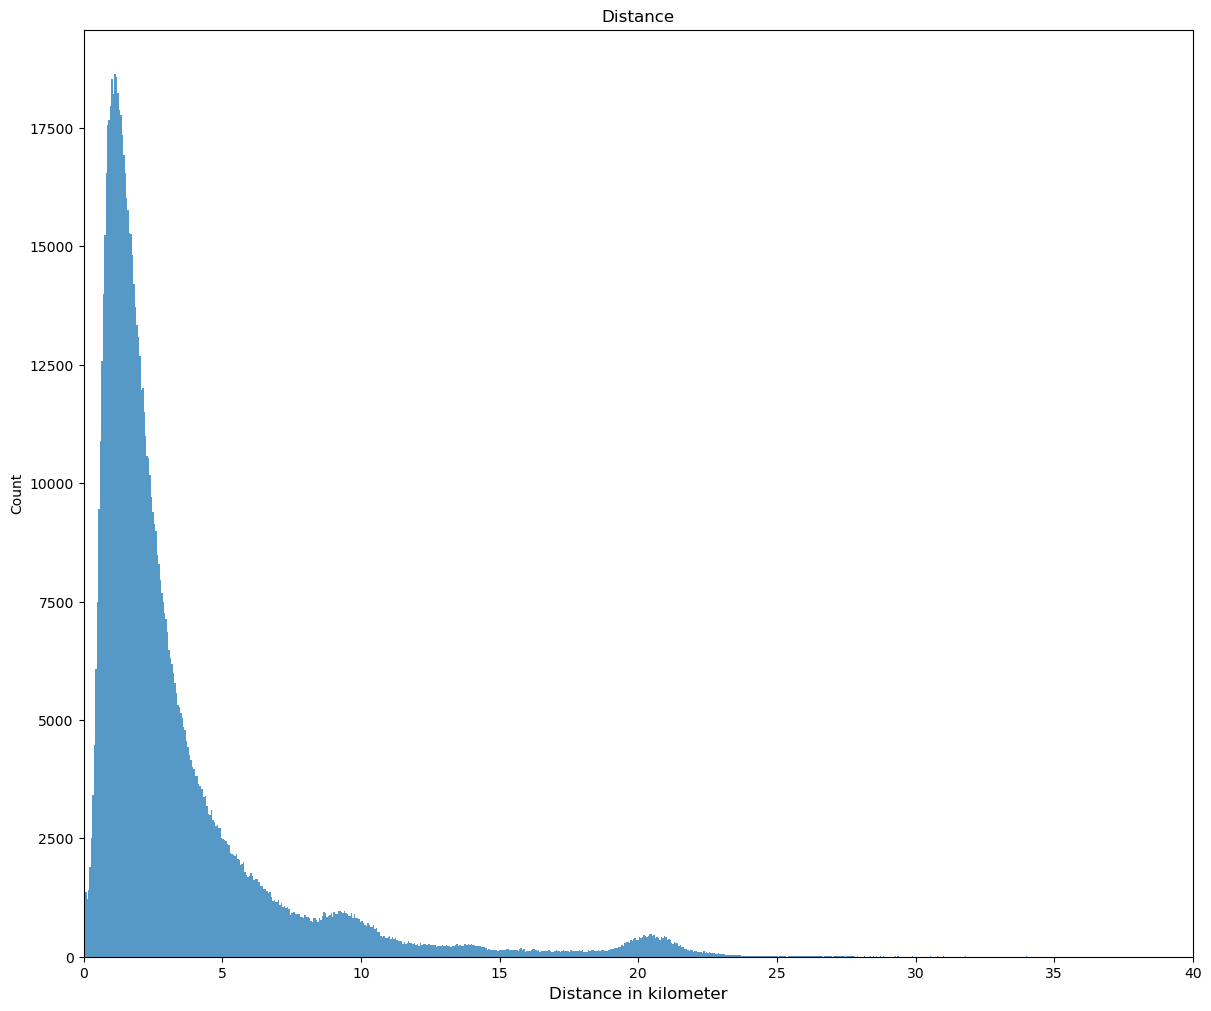

In [24]:
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = fig.add_gridspec(1, 1)  
ax = fig.add_subplot(gs[0, 0])   

sns.histplot(data=df, x='euclidean_distance', palette='magma', ax=ax)
ax.set_title('Distance')
ax.set_xlabel('Distance in kilometer', fontsize=12)
plt.xlim(0, 40)
plt.show()

- The distribution of trip distances is **highly right-skewed**, meaning that most trips are very short while a few trips are extremely long.  
- The majority of trips are **between 0 and 5 kilometers**, which aligns with expectations for NYC taxi rides (short city trips).  
- There is a **sharp decline in frequency** after 5 km, but still a noticeable number of trips up to ~10 km.  
- A smaller secondary peak can be observed around **20 km**, which may correspond to trips to/from airports (e.g., JFK or LaGuardia).  
- Very long trips (>30 km) are rare and might represent outliers or unusual travel behavior.  


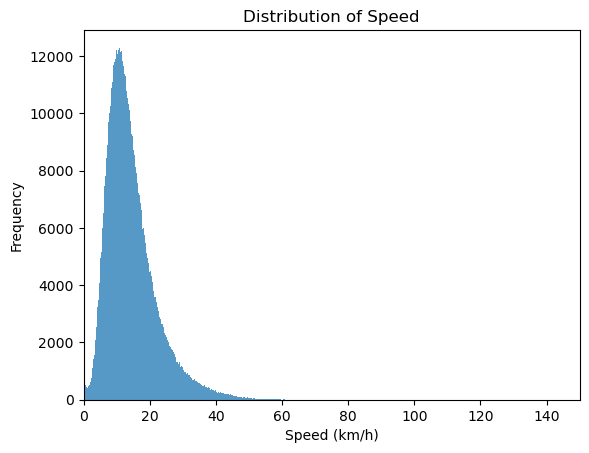

In [28]:
df['speed_kmh']= df['euclidean_distance']/(df['trip_duration']/(60*60)) # Speed = distance / time

# Create the histogram plot
sns.histplot(df['speed_kmh'])
# Set the x-axis limit to the desired range
plt.xlim(0, 150)
# Add labels and title (optional)
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Speed')
plt.show()

- **Skewness**: The distribution is right-skewed, indicating that most of the speeds are lower, with fewer instances of higher speeds.
- **Peak Frequency**: A significant number of observations are clustered around a speed of approximately 10 km/h.
- **Range**: The speeds range from 0 to about 140 km/h, but only a few instances exceed 40 km/h.
- **Potential Implications**: This distribution might suggest that the majority of the measured speeds are occurring in a controlled or low-speed environment, such as urban areas or under congested conditions.

Number of trips completely outside NYC: 3390 out of 1000000
Number of trips after filtering: 996610


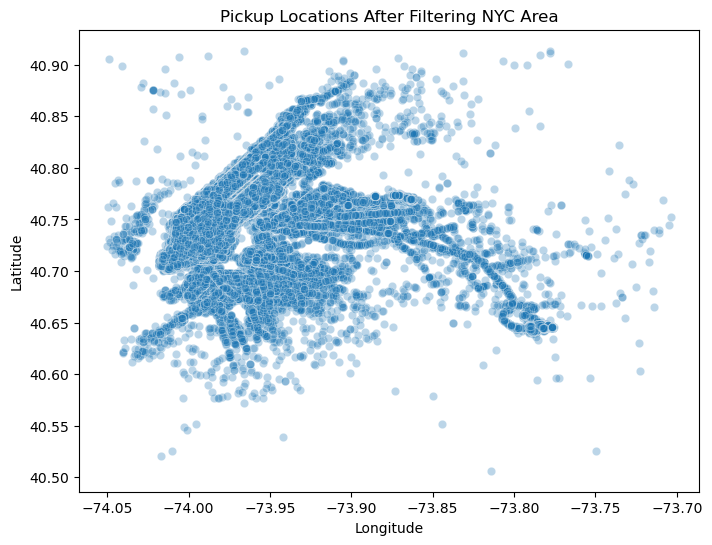

In [31]:
# Define reasonable NYC boundaries
lat_min, lat_max = 40.5, 40.92
lon_min, lon_max = -74.05, -73.7

# Filter trips within NYC boundaries
mask_nyc = (
    (df['pickup_latitude'].between(lat_min, lat_max)) &
    (df['pickup_longitude'].between(lon_min, lon_max)) &
    (df['dropoff_latitude'].between(lat_min, lat_max)) &
    (df['dropoff_longitude'].between(lon_min, lon_max))
)

# Count trips outside NYC boundaries
num_outside = (~mask_nyc).sum()
print(f"Number of trips completely outside NYC: {num_outside} out of {len(df)}")

# Keep only trips within NYC
df = df[mask_nyc].copy()
print(f"Number of trips after filtering: {len(df)}")

# Scatter plot of pickup locations after filtering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, alpha=0.3)
plt.title("Pickup Locations After Filtering NYC Area")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


- Out of 1,000,000 trips, only 3,390 were completely outside NYC.
- After filtering, 996,610 trips within NYC remain.
- The scatter plot shows that most pickup locations are tightly clustered within the NYC area, indicating the filter worked as intended.
- Very few pickups fall outside of the main NYC region.

## Traffic Analysis by Time 

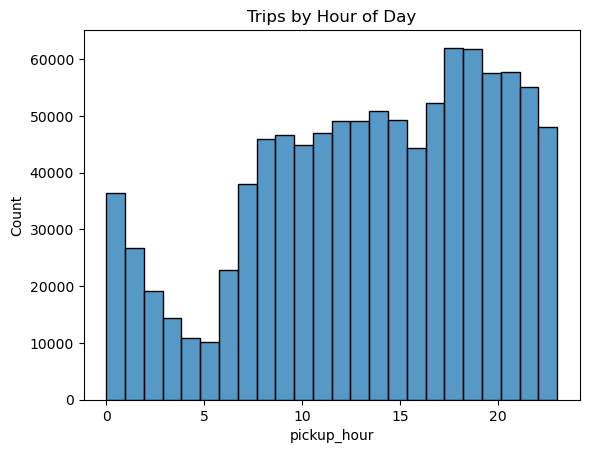

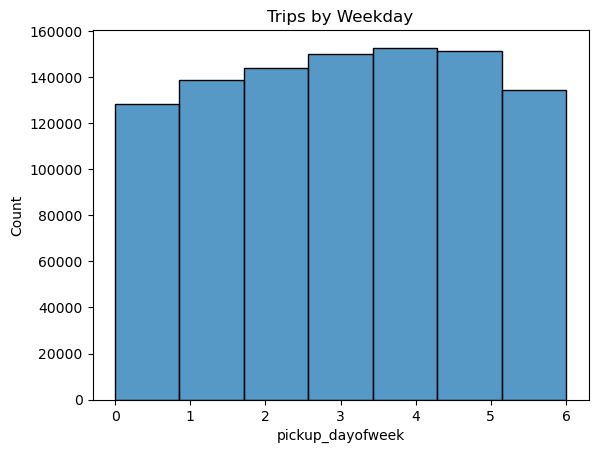

In [30]:
sns.histplot(df['pickup_hour'], bins=24)
plt.title("Trips by Hour of Day")
plt.show()

sns.histplot(df['pickup_dayofweek'], bins=7)
plt.title("Trips by Weekday")
plt.show()


### Trips by Hour of Day
- **Peak Hours**: High trip frequency between 15:00 and 20:00.
- **Low Activity**: Fewer trips occur between 2:00 and 5:00.

### Trips by Weekday
- **Consistent Activity**: Trips are fairly even throughout the weekdays.
- **Slight Dip**: Fewer trips observed on Sundays.



Text(0.5, 1.0, 'Trip duration per day of week per hour of day')

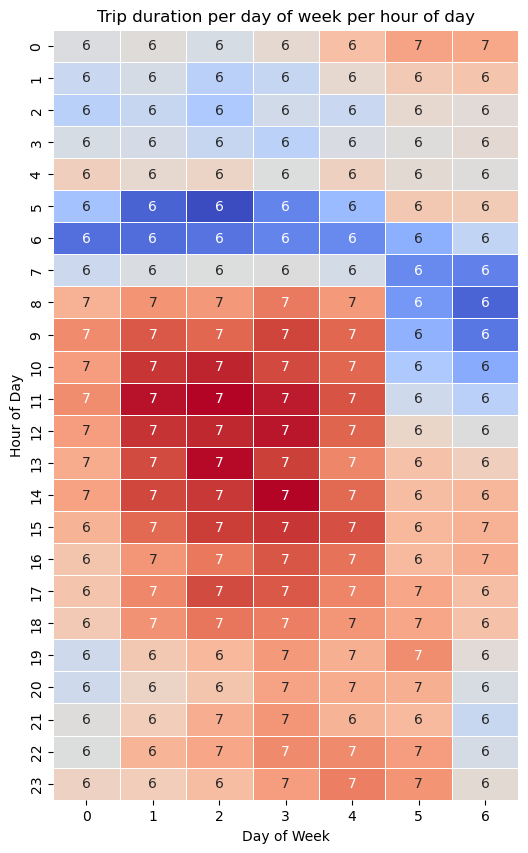

In [37]:
table = pd.pivot_table(
    df, 
    values='trip_duration_log', 
    index='pickup_hour',
    columns='pickup_dayofweek', 
    aggfunc="median"
)

plt.figure(figsize=(6,10))
ax = sns.heatmap(table, annot=True, fmt='.0f', cmap='coolwarm', linewidths='0.5', cbar=False)
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.title('Trip duration per day of week per hour of day')


- **Trip durations are higher (value: 7) during daytime hours (8:00–18:00) across most days of the week.**
- **Early morning and late night hours (0:00–7:00, 20:00–23:00) tend to have lower trip durations (value: 6).**
- **There is little variation in trip duration across different days of the week; the main changes happen by hour.**
- **Peak durations are observed midday from 10:00 to 15:00.**
- **The lowest durations occur consistently in the early morning around 5:00–7:00.**

## Correlation Analysis

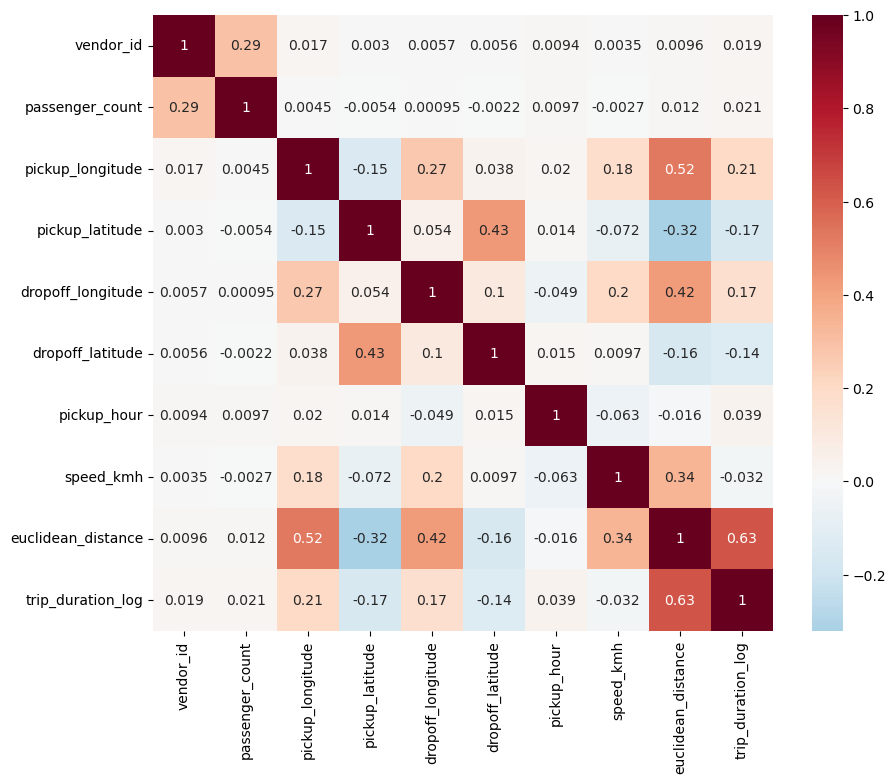

In [49]:
cols = [
    'vendor_id',
    'passenger_count',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'pickup_hour',
    'speed_kmh',
    'euclidean_distance',
    'trip_duration_log'
]

# Compute the correlation matrix for just these columns
corr = df[cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)
plt.show()

## Insights from the Correlation Table

- **Euclidean distance and trip duration log** have a strong positive correlation (0.63), indicating that longer distances generally lead to longer trip durations.
- **Speed (speed_kmh) and trip duration log** have a near-zero correlation (-0.03), which is expected since trip duration depends mainly on distance, not speed alone.
- **Pickup and dropoff coordinates** have weak-to-moderate correlations with trip duration log (e.g., pickup_longitude: 0.21, dropoff_longitude: 0.17), suggesting some geographical effect on trip durations, but not a dominant one.
- **Pickup hour** and **passenger count** both have very weak correlations with trip duration log, indicating that time of day and number of passengers do not significantly affect trip duration in this dataset.